In [58]:
import urllib
import urllib.request

In [59]:
def request(url):
    http_reponse = urllib.request(url)
    byte_data = http_reponse.read()
    text_data = byte_data.decode('utf-8')
    return text_data

In [94]:
url = 'https://python.bakyeono.net'
webpage = urllib.request.urlopen(url).read().decode('utf-8')
# print(webpage)

html이 아니라 json 파일로 가져와보자

In [61]:
url = 'https://python.bakyeono.net/data/movies.json'  # 요청할 주소
text_data = urllib.request.urlopen(url).read().decode('utf-8')
print(text_data)

[
    {
        "title": "Interstella",
        "genre": "SF",
        "year": 2014,
        "starring": ["M. McConaughey", "A. Hathaway", "J. Chastain"]
    },
    {
        "title": "Braveheart",
        "genre": "Drama",
        "year": 1995,
        "starring": ["M. Gibson", "S. Marceau", "P. McGoohan"]
    },
    {
        "title": "Mary Poppins",
        "genre": "Fantasy",
        "year": 1964,
        "starring": ["J. Andrews", "D. Van Dyke"]
    }
]



다음과 같이 json 파일이 python으로 처리하기에 더 편하다

In [62]:
import json
movies = json.loads(text_data)
sorted_by_year = sorted(movies, key = lambda movie: movie['year'])
for movie in sorted_by_year:
    print(str(movie['year']) + ' ' +  movie['title'].upper())


1964 MARY POPPINS
1995 BRAVEHEART
2014 INTERSTELLA


In [63]:
# !pip install builtwith

# Builtwith

## 접근하는 페이지에 대한 간략한 정보를 뽑는데 builtwith를 사용하면 좋다

In [64]:
from builtwith import builtwith

서버가 어떻게 응답을 하느냐에 따라서 다르다

In [65]:
builtwith("http://www.google.com")

{'web-servers': ['Google Web Server']}

In [66]:
builtwith("http://www.wordpress.com")

{'web-servers': ['Nginx'],
 'font-scripts': ['Google Font API'],
 'ecommerce': ['WooCommerce'],
 'cms': ['WordPress'],
 'programming-languages': ['PHP'],
 'blogs': ['PHP', 'WordPress']}

In [67]:
builtwith("http://www.jquery.com")

{'cdn': ['CloudFlare'],
 'javascript-frameworks': ['Modernizr', 'jQuery'],
 'cms': ['WordPress'],
 'programming-languages': ['PHP'],
 'blogs': ['PHP', 'WordPress']}

# Whois

소유자를 보고 내가 건드려도 될지 안될지를 판단할 수 있다.

In [68]:
# !pip install python-whois

In [69]:
from whois import whois

In [70]:
whois("http://www.google.com")

{'domain_name': ['GOOGLE.COM', 'google.com'],
 'registrar': 'MarkMonitor, Inc.',
 'whois_server': 'whois.markmonitor.com',
 'referral_url': None,
 'updated_date': [datetime.datetime(2018, 2, 21, 18, 36, 40),
  datetime.datetime(2018, 2, 21, 10, 45, 7)],
 'creation_date': [datetime.datetime(1997, 9, 15, 4, 0),
  datetime.datetime(1997, 9, 15, 0, 0)],
 'expiration_date': [datetime.datetime(2020, 9, 14, 4, 0),
  datetime.datetime(2020, 9, 13, 21, 0)],
 'name_servers': ['NS1.GOOGLE.COM',
  'NS2.GOOGLE.COM',
  'NS3.GOOGLE.COM',
  'NS4.GOOGLE.COM',
  'ns1.google.com',
  'ns3.google.com',
  'ns2.google.com',
  'ns4.google.com'],
 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited',
  'serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited',
  'serverTransferProhibited https://icann.org/epp#serverTransfer

# URL handling module

+ urllib.request - opening and reading URLs
+ urllib.error -  contatining the exceptions raised by urllib.requests
+ urllib.parse - parsing URLs
+ urllib.robotparser - parsing robots.txt files
+ urllib.responce -  used internally by the urllib.request module

## robotparser

이 모듈은 single class를 제공해준다. 특정한 user agent가 URL을 fetch 할 수 있는지 없는지를 robots.txt file을 기반으로 알려준다

In [71]:
from urllib import robotparser

In [72]:
robot = robotparser.RobotFileParser()
robot.set_url("https://www.google.com/robots.txt")
robot.read()
robot.can_fetch('*', 'https://www.google.com')

False

In [73]:
robot = robotparser.RobotFileParser()
robot.set_url("https://cafe.naver.com/robots.txt")
robot.read()
robot.can_fetch('*', '/MailContent.nhn')
robot.can_fetch('*', '/starbucksgossip')


True

다만 결과가 정확하지 않을 때가 있다.

In [74]:
robot = robotparser.RobotFileParser()
robot.set_url("https://news.naver.com/robots.txt")
robot.read()
# robot.can_fetch('*', '/main/imagemontage')  # False 값
robot.can_fetch('Yeti', '/main/imagemontage')


True

똑같은 경로에 대해서 yeti로 바꾸면 true 값으로 바뀐다. 봇 이름만 바꾸면 얼마든지 접근 가능하다.

# urllib, request

### 둘의 차이점 

<br>

1. 데이터를 보낼때 requests는 딕셔너리 형태, urllib는 인코딩하여 바이너리 형태로 전송합니다.

2. requests는 요청 메소드(get, post)를 명시하지만 urllib는 데이터의 여부에 따라 get과 post 요청을 구분합니다.

3. 없는 페이지 요청시 requests는 에러를 띄우지 않지만 urllib는 에러를 띄웁니다.

http를 통해서 상대방 서버에 request를 날려보자

In [75]:
from urllib import request

In [76]:
# 파라미터 중 필요한건 url 딱 하나밖에 없다
resp = request.urlopen('http://www.google.com')

In [77]:
resp.geturl()

'http://www.google.com'

In [78]:
resp.getcode()

200

In [79]:
resp.getheaders()

[('Date', 'Wed, 01 May 2019 11:50:48 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Content-Type', 'text/html; charset=ISO-8859-1'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-05-01-11; expires=Fri, 31-May-2019 11:50:48 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'NID=182=hk-7trdimOJUgJ-zUlCwRaq2G_ycIai8P3-4NYkJ5eyUdCsQP-iyczd8Ha486gsCjbKMvyN9jdVGFWwEQpqq3JeHJxwUstjrQbKnAVUjpw4lfKqr9SM7pcogonrSZDjfuGAcS4gg_IUZO1JBfKGVC5NUHSUDKXoEIpxc0ydOqQ8; expires=Thu, 31-Oct-2019 11:50:48 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Accept-Ranges', 'none'),
 ('Vary', 'Accept-Encoding'),
 ('Connection', 'close')]

주소를 따온다음에 request를 보내보자 검색어 '박보영'
하지만 에러가 뜨는게 정상이다. 권한이 없다고 뜬다.
그래서 header를 봐야한다. robots.txt를 보면 root에서 search로 시작하는건 disallow로 되어있다.


In [80]:
# 파라미터 중 필요한건 url 딱 하나밖에 없다
from urllib import request, error

try:
    resp = request.urlopen('https://www.google.com/search?source=hp&ei=jDPIXN-EF4P8wQOt0aH4Cg&q=%EB%B0%95%EB%B3%B4%EC%98%81&btnK=Google+%EA%B2%80%EC%83%89&oq=%EB%B0%95%EB%B3%B4%EC%98%81&gs_l=psy-ab.3..0l10.47979.50178..50304...6.0..0.113.1249.11j2......0....1..gws-wiz.....6..35i39j0i10j0i131.aHkk85Rw7TE')
except error.HTTPError as e:
    print(e.code)
    print(e.reason)
    print(e.headers)

403
Forbidden
Content-Type: text/html; charset=UTF-8
Date: Wed, 01 May 2019 11:50:50 GMT
Server: gws
Cache-Control: private
X-XSS-Protection: 0
X-Frame-Options: SAMEORIGIN
Alt-Svc: quic=":443"; ma=2592000; v="46,44,43,39"
Accept-Ranges: none
Vary: Accept-Encoding
Connection: close




In [81]:
url = 'https://www.google.com/search?ei=vjPIXLq4J5DmwQPElJOoDQ&q=%EB%B0%95%EB%B3%B4%EC%98%81&oq=%EB%B0%95%EB%B3%B4%EC%98%81&gs_l=psy-ab.3..0i67l3j0i131l3j0i67j0j0i131j0.3377.3949..4013...0.0..0.90.354.4......0....1..gws-wiz.nODVn5n3xr8'

req = request.Request(url, headers={"user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36"},
                method="GET")
try:
    resp = request.urlopen(req)
except error.HTTPError as e:
    print(e.code)
    print(e.reason)
    print(e.headers)
resp.geturl()
resp.getcode()
resp.getheaders()

[('Content-Type', 'text/html; charset=UTF-8'),
 ('Date', 'Wed, 01 May 2019 11:50:50 GMT'),
 ('Expires', '-1'),
 ('Cache-Control', 'private, max-age=0'),
 ('Strict-Transport-Security', 'max-age=31536000'),
 ('P3P', 'CP="This is not a P3P policy! See g.co/p3phelp for more info."'),
 ('Server', 'gws'),
 ('X-XSS-Protection', '0'),
 ('X-Frame-Options', 'SAMEORIGIN'),
 ('Set-Cookie',
  '1P_JAR=2019-05-01-11; expires=Fri, 31-May-2019 11:50:50 GMT; path=/; domain=.google.com'),
 ('Set-Cookie',
  'CGIC=; expires=Mon, 28-Oct-2019 11:50:50 GMT; path=/complete/search; domain=.google.com; HttpOnly'),
 ('Set-Cookie',
  'CGIC=; expires=Mon, 28-Oct-2019 11:50:50 GMT; path=/search; domain=.google.com; HttpOnly'),
 ('Set-Cookie',
  'NID=182=dkjg9c_0VRHL_E9lT5rr6eCHNt_uLQLRfNFxZVIve1VqdYlHH2aIwd_5Z2tUBMeNKMilJ3HwhvfRX5q2CRcrKfXr5-WtLryjmkfIX5QZMZL8AkVeD9ZUN-mu7uOm4e8MW-JjqiCczysZGozL7gttR65Db795XnKaYeQD7Qlk00Y; expires=Thu, 31-Oct-2019 11:50:50 GMT; path=/; domain=.google.com; HttpOnly'),
 ('Alt-Svc', 'q

get 방식에서는 물음표 뒤가 파라미터이다. 파라미터를 나눌 수 있다.
"https://www.google.com/search?source=hp&ei=jDPIXN-EF4P8wQOt0aH4Cg&q=%EB%B0%95%EB%B3%B4%EC%98%81&btnK=Google+%EA%B2%80%EC%83%89&oq=%EB%B0%95%EB%B3%B4%EC%98%81&gs_l=psy-ab.3..0l10.47979.50178..50304...6.0..0.113.1249.11j2......0....1..gws-wiz.....6..35i39j0i10j0i131.aHkk85Rw7TE"

In [82]:
# 200 => OK
# 400 => 내 잘못
# 500 => 님 잘못 => Traffic 과도하게 증가 X

from urllib import parse

url = 'https://www.google.com/search'
header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'}

# url을 받아서 하는 애
def download(url, params={}, pretries=3):
    resp = None
    
    try:
        req = request.Request(url + "?" + parse.urlencode(params), headers=header)
        resp = request.urlopen(req)
        
    except error.HTTPError as e:
        if 500 <= e.code < 600 and retries > 0:
            resp = download(url, params, retries-1)
        else:
            print(e.code)
            print(e.reason)
            print(e.geturl())
            print(e.headers)
    
    return resp

In [83]:
# 한글을 넣으려면 인코딩 해줘야한다
params = {'q':'박보영'}
# download(url, params).read()

In [84]:
# url을 만져주는게 parse
params = {'q':'박보영'}
parse.urlencode(params)

'q=%EB%B0%95%EB%B3%B4%EC%98%81'

In [85]:
parse.urlparse(url)
parse.urljoin(url,'urljoin')

'https://www.google.com/urljoin'

In [86]:
# 여기다가 구글에서 했던거 하면 google.com 등 파라미터들이 싹 다 쪼개진다. 6개의 튜플로 쪼개진다
result = parse.urlparse('https://www.google.com/search?q=%EB%B0%95%EB%B3%B4%EC%98%81')
[_ for _ in result]

['https', 'www.google.com', '/search', '', 'q=%EB%B0%95%EB%B3%B4%EC%98%81', '']

In [87]:
parse.unquote('%EB%B0%95%EB%B3%B4%EC%98%81')

'박보영'

In [88]:
parse.quote('박 보 영'), parse.quote_plus('박 보 영')

('%EB%B0%95%20%EB%B3%B4%20%EC%98%81', '%EB%B0%95+%EB%B3%B4+%EC%98%81')

In [89]:
params = {"q":"박보영"}
resp = download("https://www.google.com/search", params)

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="6wkodQZmTInSOMwRcusKcg==">(function(){window.google={kEI:\'G4jJXIOYCsq3mAWzorOADQ\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_G4jJXIOYCsq3mAWzorOADQ\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=goo
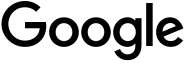
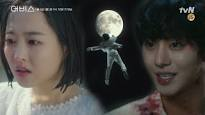
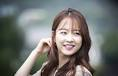
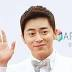

In [90]:
# resp.read().decode("utf-8")

## requests 패키지는 하이레벨 인터페이스

In [91]:
import requests

resp = requests.get('http://www.google.com/search', params={'q':'박보영'})
# resp.text

In [92]:
resp.status_code, resp.reason, resp.headers


(200,
 'OK',
 {'Date': 'Wed, 01 May 2019 11:50:51 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Transfer-Encoding': 'chunked', 'Set-Cookie': '1P_JAR=2019-05-01-11; expires=Fri, 31-May-2019 11:50:51 GMT; path=/; domain=.google.com, CGIC=IgMqLyo; expires=Mon, 28-Oct-2019 11:50:51 GMT; path=/complete/search; domain=.google.com; HttpOnly, CGIC=IgMqLyo; expires=Mon, 28-Oct-2019 11:50:51 GMT; path=/search; domain=.google.com; HttpOnly, NID=182=sJW-gP4beCuozveOpovlyvZsZFOUV_9AbhHOKWVvRauW7FEtWQ07jKPKMYCXYIwWLLFRATFX4AW_OztIxsVuRp9zzc-yv1jLH1P64B1oUIPWrhobISwF5-l88dSWt-s_NcQjZ8O5-d43k05Y9nWzhdKp8b4gzAQvlrgGCfaZHPU; expires=Thu, 31-Oct-2019 11:50:51 GMT; path=/; domain=.google.com; HttpOnly'})

In [93]:
resp.request.headers

{'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}